# Amazon Fine Foods Reviews

This analysis seeks to understand some of the most frequent product names and adjectives used within 1-star fine food reviews. The data set was downloaded from Kaggle (uploaded by Stanford Network Analysis project).

In [1]:
import pandas as pd

In [2]:
# read the CSV file
reviews = pd.read_csv('amazon_fine_foods_reviews.csv')

# verify the data
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# print the number of columns in the data set
print(len(reviews.keys()))

10


In [4]:
# print the number of rows and columns in the data set
reviews.shape

(568454, 10)

In [5]:
# print the column names and types
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
# verify the distribution of scores
reviews['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

<AxesSubplot:>

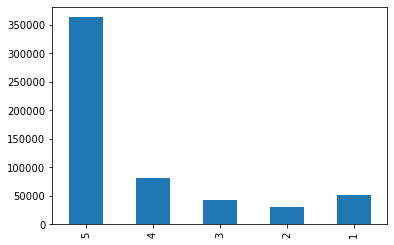

In [7]:
# display distribution
reviews['Score'].value_counts().sort_index(ascending=False).plot(kind='bar')

## Initial Analysis

As shown in the bar chart above, most of the fine foods reviews are 5 stars (with over 350,000 5-star reviews). Each of the remaining possible scores (stars) has less than 100,000 reviews each.

Since there are over 500,000 records in the data set, a sample of 2,000 reviews will be taken for analysis of a subset of the data.

In [8]:
# create a subset of data for analysis
sample_reviews = reviews.sample(n=2000)

In [9]:
# verify the number of samples is correct
sample_reviews.shape

(2000, 10)

<AxesSubplot:>

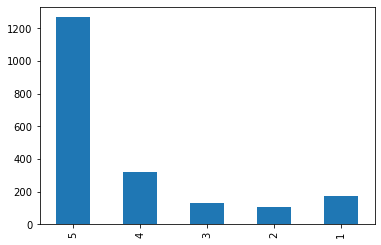

In [10]:
# display distribution of reviews for sample data set
sample_reviews['Score'].value_counts().sort_index(ascending=False).plot(kind='bar')

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [12]:
# create subset of initial data with only 1-star reviews
one_star_reviews = reviews[reviews['Score'] == 1]

# verify shape of data set
one_star_reviews.shape

(52268, 10)

<AxesSubplot:>

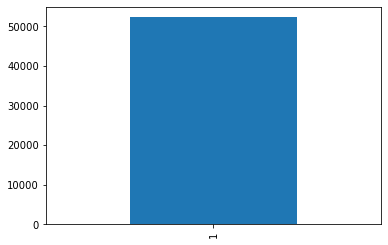

In [13]:
# verify the reviews are only 1 star
one_star_reviews['Score'].value_counts().plot(kind='bar')

In [14]:
# verify first few records of new data subset
one_star_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d..."
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...


In [15]:
# create a sample of only 1-star reviews
one_star_sample = one_star_reviews.sample(n=2000)

In [16]:
# verify the number of rows
one_star_sample.shape

(2000, 10)

# Text Analysis

Now that the sample data frame contains only 1-star reviews, the next step is to analyze the 'Text' column for frequently used products.

In [17]:
# perform NLP pre-processing one one text document
doc = nlp(''.join(str(one_star_sample['Text'].tolist())))

In [18]:
# verify the few several characters the document
print(doc[0:200])

["Ordered these for a clients' wedding after reading some good reviews.  The almonds were shipped in a way too small bubble envelope mailer.  When they arrived, the envelope was ripped open and about half of the almonds were unusable because they were broken and crushed during shipping.  Terrible packaging job!  Suck it up and use a real box.  I know it costs more but it almost destroyed this order (ruined half actually).  I'm a small business owner and want to keep costs down too but this was just unacceptable.<br /><br />As for the quality of the almonds that survived: they were ok.  Not terrible, but I found the ones we ordered through nuts.com to be better (thinner candy coating, larger almonds, fresher taste).  Yes, they're more expensive but after not being able to use a good portion of this order, it may be worth it.  They at least ship their items in a padded box.", "I will preface this by saying that


In [19]:
# remove unecessary backslashes from the text
doc = nlp(str(doc).replace('\\', ''))

In [20]:
# remove <br /> HTML tags
doc = nlp(str(doc).replace('<br />', ''))

In [21]:
# remove stop words from the text
from spacy.lang.en import STOP_WORDS

# create list to store one star products
one_star_products = []

# add words to list if they are tagged as a product and not a stop word
for ent in doc.ents:
    if ent.label_ == "PRODUCT":
        if ent.label_ not in STOP_WORDS:
            one_star_products.append(str(ent))

# sort the products in alphabetical order
sorted_products = sorted(one_star_products, key=str)

# import Counter to store list values as keys, and their frequencies as values
# in a dictionary

from collections import Counter
import numpy as np

# store the most frequent 20 products into an array
most_frequent = np.asarray(Counter(sorted_products).most_common(20))

# print the top twenty products
print(most_frequent)

[['Valerian' '8']
 ['Diet Coke' '4']
 ['ConAgra' '3']
 ['Crystal Light' '3']
 ['Gatorade' '3']
 ['Subscribe' '3']
 ['Dingo' '2']
 ['IM TRULY SURPRISED' '2']
 ['Jack Links' '2']
 ['Own Organics' '2']
 ['Trident' '2']
 ['B001VNGJU0">Frontier Poppy Seed Whole' '1']
 ['Barilla' '1']
 ['Beef' '1']
 ['Blood' '1']
 ['Blue Mountain Coffer' '1']
 ['Clam Chowder' '1']
 ['Classic' '1']
 ['Classic Coke' '1']
 ['Dreamcoat' '1']]


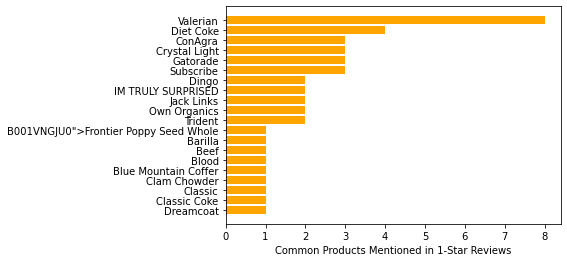

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# configure horizontal bar chart of most frequenty terms, and their counts
# from the list of Counter tuples
plt.barh(most_frequent[:,0], [int(x) for x in most_frequent[:,1]],
                             color='orange', align='center')

# invert the Y-axis to display the most frequent on top
ax.invert_yaxis()

# label the X-axis
ax.set_xlabel('Common Products Mentioned in 1-Star Reviews')

# display the plot
plt.show()

## Product Analysis

As shown in the bar chart above, the most frequently mentioned product in 1-star reviews is Valerian (mentioned in 8 reviews), followed by Diet Coke (mentioned in 4 reviews).

In [23]:
# analyze adjectives used
one_star_adj = []

# collect adjectives that are not stop words
for token in doc:
    if token.pos_ == 'ADJ':
        if ent.label_ not in STOP_WORDS:
            one_star_adj.append(str(token))
            
# sort the list
sorted_adj = sorted(one_star_adj, key=str)

# store most frequent words as an array
most_freq_adj = np.asarray(Counter(sorted_adj).most_common(20))

# print the most used adjectives
print(most_freq_adj)

[['good' '444']
 ['other' '334']
 ['more' '256']
 ['same' '236']
 ['bad' '228']
 ['little' '197']
 ['first' '182']
 ['better' '170']
 ['great' '170']
 ['old' '169']
 ['few' '163']
 ['different' '153']
 ['disappointed' '136']
 ['much' '132']
 ['real' '127']
 ['new' '124']
 ['many' '123']
 ['free' '112']
 ['sweet' '110']
 ['small' '102']]


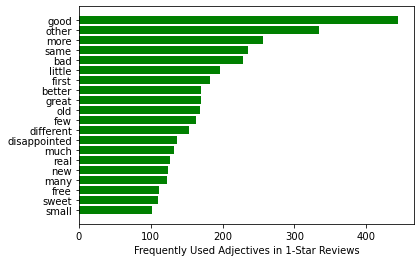

In [24]:
fig, ax = plt.subplots()

plt.barh(most_freq_adj[:, 0], [int(i) for i in most_freq_adj[:, 1]],
        color='green', align='center')

ax.invert_yaxis()
ax.set_xlabel('Frequently Used Adjectives in 1-Star Reviews')

plt.show()

## Adjective Analysis

Interestingly, as shown in the bar chart above, the most frequent adjective used in 1-star reviews was the word 'good'. The word 'bad' was the fifth most used adjective in 1-star reviews (for this specific sample of data). The overall list of adjectives makes sense, since terms such as 'bad', 'old', and 'disappointed' appear on the list.